In [3]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
import matplotlib.cm as cm
from collections import Counter
plt.style.use('bmh'); sns.set()

In [7]:
price = pd.read_csv('price.csv')

#load preprocessing
price.drop("Observation", axis=1, inplace=True)
price.drop_duplicates(inplace=True)
price['Parking'] = price['Parking'].astype('category')
price['City_Category'] = price['City_Category'].astype('category')
price2 = price[np.abs(price.House_Price - price.House_Price.mean())<=(2*price.House_Price.std())]
price2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 931 entries, 0 to 931
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Dist_Taxi      918 non-null    float64 
 1   Dist_Market    918 non-null    float64 
 2   Dist_Hospital  930 non-null    float64 
 3   Carpet         923 non-null    float64 
 4   Builtup        916 non-null    float64 
 5   Parking        931 non-null    category
 6   City_Category  931 non-null    category
 7   Rainfall       931 non-null    int64   
 8   House_Price    931 non-null    int64   
dtypes: category(2), float64(5), int64(2)
memory usage: 60.3 KB


In [9]:
# melakukan statistika deskriptif
# transpose untuk merubah posisi index dengan columnsnya
price2.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Dist_Taxi,918.0,NaN,NaN,NaN,8216.185185,2530.25499,146.0,6475.5,8229.0,9934.25,16850.0
Dist_Market,918.0,NaN,NaN,NaN,11007.940087,2524.088666,1666.0,9349.25,11155.0,12663.5,18281.0
Dist_Hospital,930.0,NaN,NaN,NaN,13061.101075,2566.001284,3227.0,11301.25,13154.5,14787.75,22407.0
Carpet,923.0,NaN,NaN,NaN,1487.173348,249.940193,775.0,1318.0,1480.0,1654.0,2229.0
Builtup,916.0,NaN,NaN,NaN,1782.9869,297.634223,932.0,1583.0,1774.0,1982.0,2667.0
Parking,931,4,Open,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City_Category,931,3,CAT B,364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rainfall,931.0,NaN,NaN,NaN,785.209452,265.449171,-110.0,600.0,780.0,965.0,1560.0
House_Price,931.0,NaN,NaN,NaN,5930113.856069,1728283.162635,30000.0,4658000.0,5866000.0,7180500.0,11632000.0


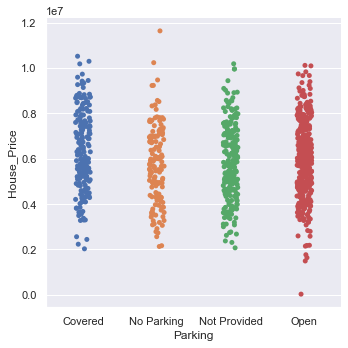

In [11]:
# melihat apakah ada kecendrungan antara parking dan house price
p = sns.catplot(x='Parking', y='House_Price', data=price2)

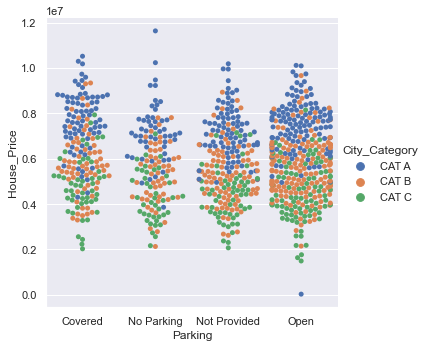

In [14]:
# melihat plot dengan informasi dari 3 variabel sekaligus
# (untuk melihat kemungkinan faktor interaksi)
# kind = swarm digunakan untuk visualisasi data yang mepet agar dapat memudahkan melihat titik-titik sebaran data
p = sns.catplot(x='Parking', y='House_Price', hue='City_Category', kind='swarm', data=price2)

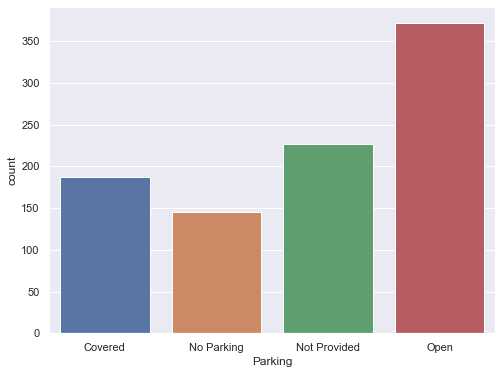

In [17]:
# barchart/countplot digunakan untuk visualisasi data kategori. kalo histogram digunakan untuk visualisasi data numerik/
# continuos
plt.figure(figsize=(8,6))
p = sns.countplot(x="Parking", data=price2)

In [24]:
def groupedbarplot(df, width=0.8, annotate='values', ax=None, **kw):
    ax = ax or plt.gca()
    n = len(df.columns)
    w = 1./n
    pos = (np.linspace(w/2., 1-w/2., n)-0.5)*width
    w *= width
    bars = []
    for col, x in zip(df.columns, pos):
        bars.append(ax.bar(np.arange(len(df))+x, df[col].values, width=w, **kw))
        # matplotlib.pyplot.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)
        for val, xi in zip(df[col].values, np.arange(len(df))+x):
            if annotate:
                txt = val if annotate == "values" else col
                ax.annotate(txt, xy=(xi, val), xytext=(0,2),
                           textcoords="offset points",
                           ha="center", va="bottom")
    ax.set_xticks(np.arange(len(df)))
    ax.set_xticklabels(df.index)
    return bars
    

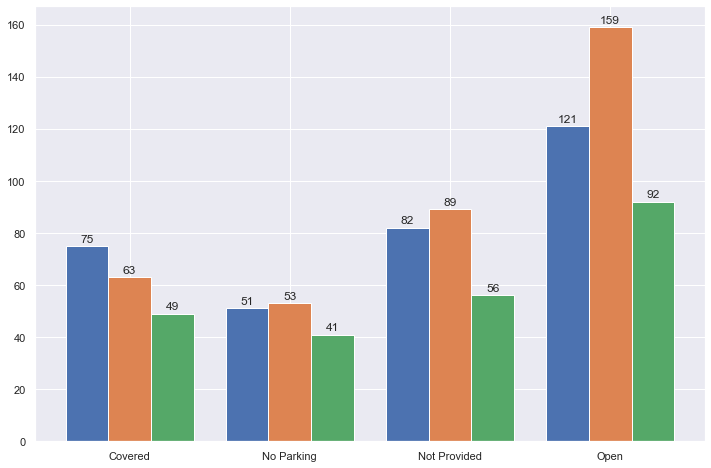

In [34]:
counts = price2.groupby(['Parking', 'City_Category']).size().unstack()
plt.figure(figsize=(12,8))
groupedbarplot(counts)
plt.show()

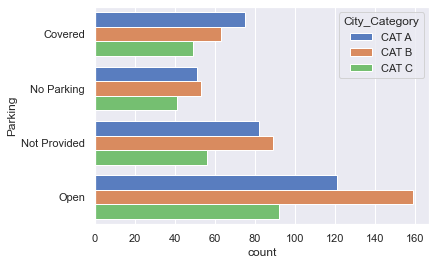

In [43]:
ax = sns.countplot(y='Parking', hue='City_Category', palette='muted', data=price2)

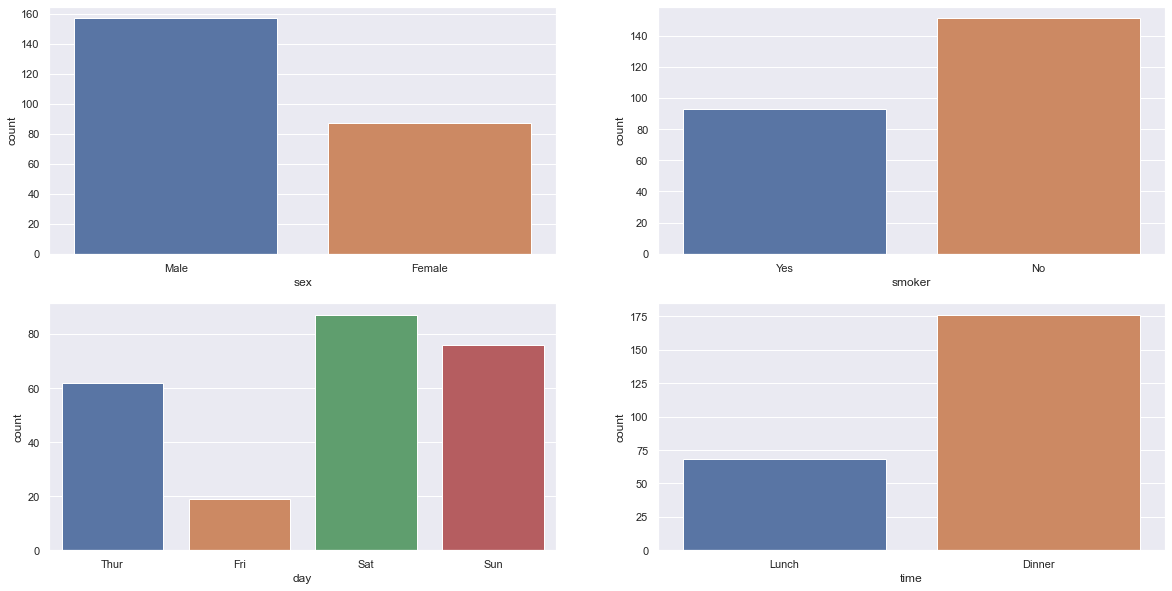

In [48]:
tips = sns.load_dataset('tips')
categorical = tips.select_dtypes(include=['category']).columns
figure, ax = plt.subplots(2,2, figsize=(20,10))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(tips[variable], ax=subplot)

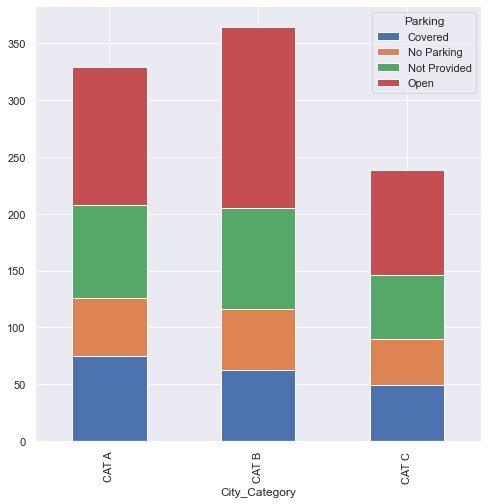

In [51]:
CT = pd.crosstab(index=price2['City_Category'], columns=price2['Parking'])
p = CT.plot(kind='bar', figsize=(8,8), stacked=True)

In [52]:
# ini dilakukan jika kita ingin menyimpan plotnya kedalam satu file
p.figure.savefig('barChart.png')

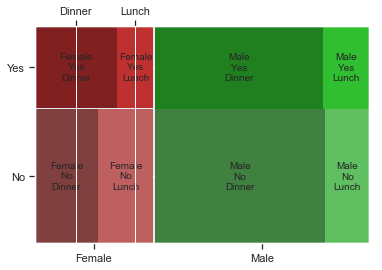

In [54]:
# for multiple categorical
from statsmodels.graphics.mosaicplot import mosaic

p = mosaic(tips, ['sex','smoker','time'])

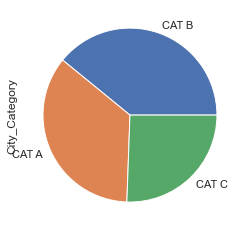

In [69]:
# pie chart
plot = price2.City_Category.value_counts().plot(kind='pie')

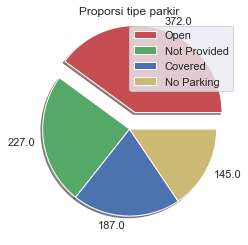

In [80]:
data = price2['Parking']

proporsion = Counter(data)
values = [float(v) for v in proporsion.values()]
colors = ['r','g','b','y']
labels = proporsion.keys()
explode = (0.2,0,0,0)
plt.pie(values, colors=colors, labels= values, explode=explode, shadow=True)
plt.title('Proporsi tipe parkir')
plt.legend(labels,loc='best')
plt.show()

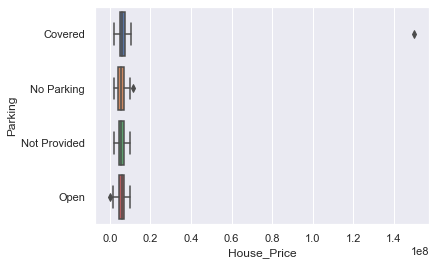

In [81]:
# visualisasi box plot dengan outlier
p = sns.boxplot(x='House_Price', y='Parking', data=price)

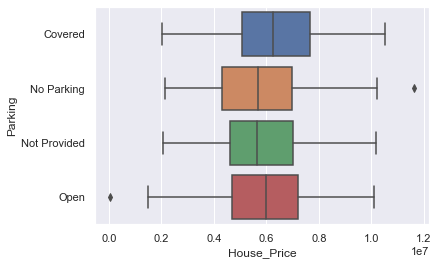

In [82]:
# visualisasi box plot dengan tanpa outlier
p = sns.boxplot(x='House_Price', y='Parking', data=price2)

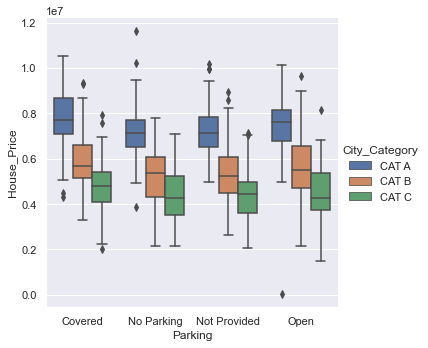

In [87]:
# boxplot bisa juga dipisahkan berdasarkan kategori
p = sns.catplot(x='Parking', y='House_Price', hue='City_Category', kind='box', data=price2)

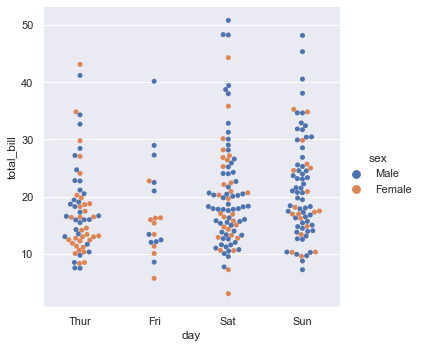

In [89]:
#swarm plot 
p = sns.catplot(x='day', y='total_bill', hue='sex', kind='swarm', data=tips)

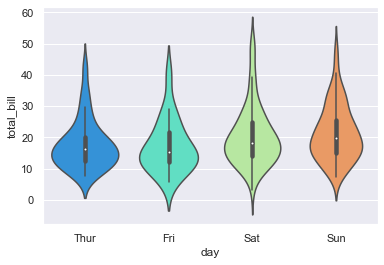

In [93]:
# violin plot
p = sns.violinplot(x='day', y='total_bill', data=tips, palette='rainbow')

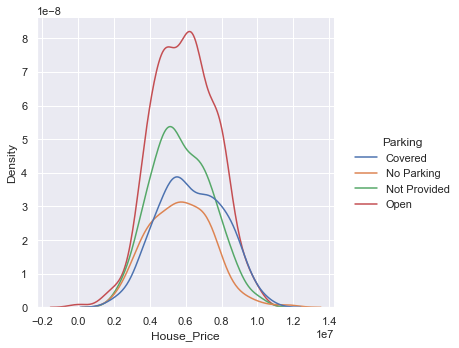

In [110]:
# histogram
col = 'House_Price'
plot = sns.displot(data=price2, hue='Parking',x=col, kind='kde')

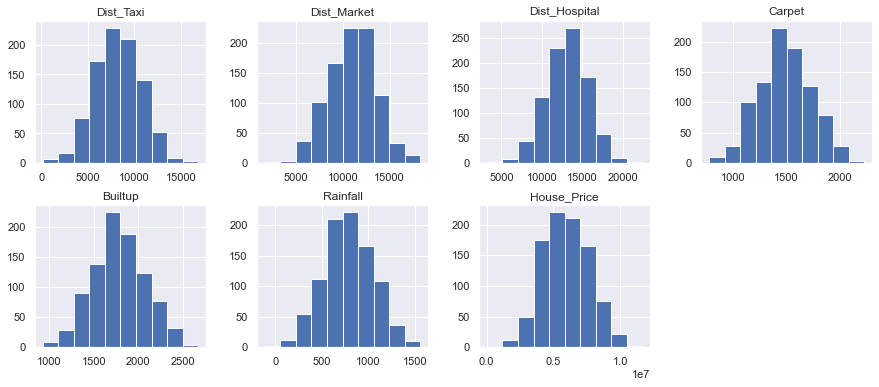

In [117]:
numerical = price2.select_dtypes(include=['float64', 'int64']).columns
price2[numerical].hist(figsize=(15,6), layout=(2,4));

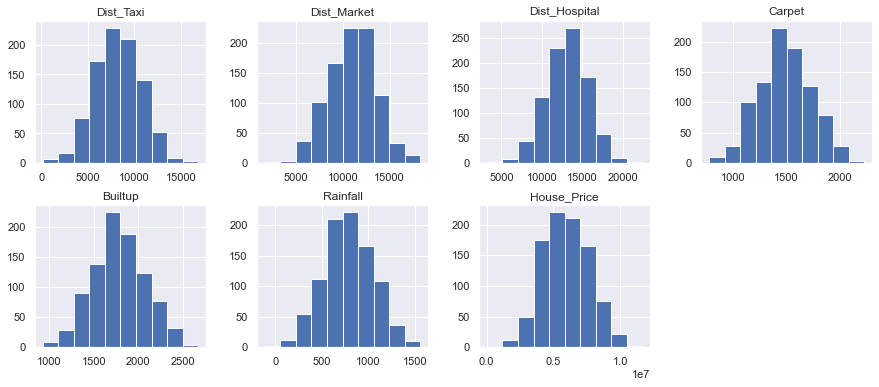

In [133]:
numerical = price2.select_dtypes(include=['float64', 'int64']).columns
price2[numerical].hist(figsize=(15,6), layout=(2,4));

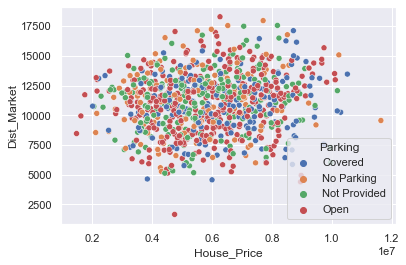

In [134]:
# scatter plot
p = sns.scatterplot(x=price2['House_Price'], y=price2['Dist_Market'], hue= price2['Parking'])

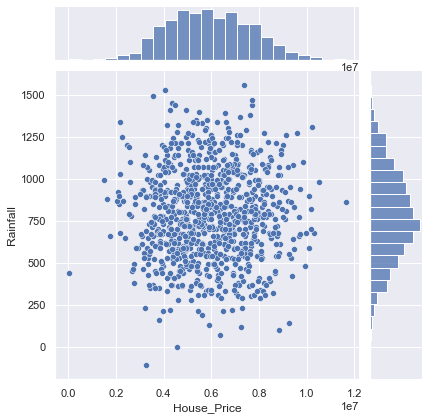

In [136]:
# jointplot / gabungan dari scatterplot dengan histogram
p = sns.jointplot(x=price2['House_Price'], y=price2['Rainfall'])

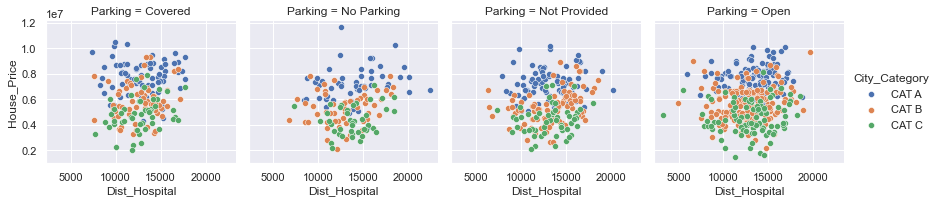

In [137]:
# conditional plot digunakan untuk data yang besar agar mudah melihat pola dari hasil plotting dibandingkan dengan jointplot
cond_plot = sns.FacetGrid(data=price2, col='Parking', hue='City_Category')
p = cond_plot.map(sns.scatterplot, 'Dist_Hospital', 'House_Price').add_legend()

In [138]:
# data correlation dari tiap variabel
price2.corr()

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Rainfall,House_Price
Dist_Taxi,1.000000,0.449838,0.796853,0.010547,0.006286,0.020506,0.109612
Dist_Market,0.449838,1.000000,0.620136,-0.018603,-0.020581,0.069419,0.118755
Dist_Hospital,0.796853,0.620136,1.000000,0.011125,0.008617,0.050748,0.130522
Carpet,0.010547,-0.018603,0.011125,1.000000,0.998871,-0.045308,0.102092
Builtup,0.006286,-0.020581,0.008617,0.998871,1.000000,-0.042104,0.094550
Rainfall,0.020506,0.069419,0.050748,-0.045308,-0.042104,1.000000,0.013430
House_Price,0.109612,0.118755,0.130522,0.102092,0.094550,0.013430,1.000000


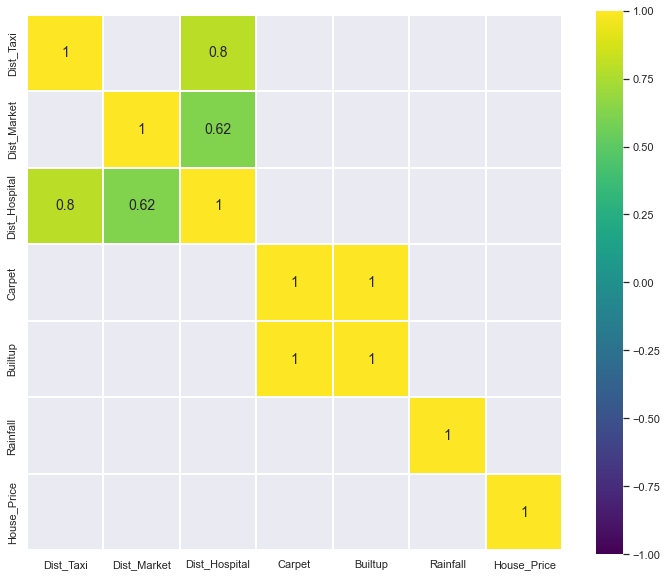

In [159]:
# heatmap untuk menyelidiki korelasi dengan secara signifikan/spesifik
corr2 = price2.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr2[(corr2 >= 0.5) | (corr2 <= -0.4)],
           cmap='viridis', vmax=1.0, vmin=-1.0, linewidth=0.1,
           annot=True, annot_kws={'size':14}, square=True);

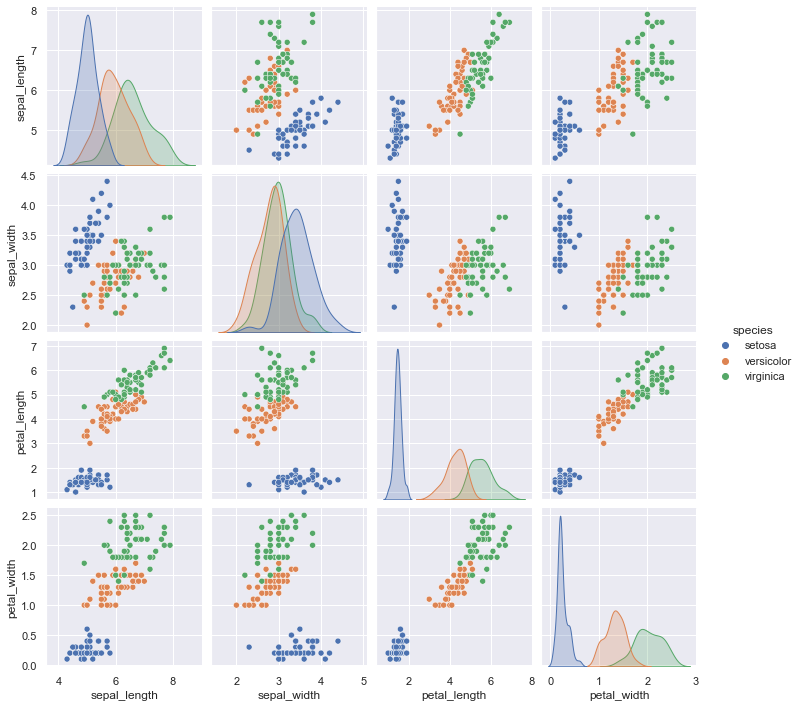

In [163]:
iris = sns.load_dataset("iris")
g = sns.pairplot(iris, hue='species')

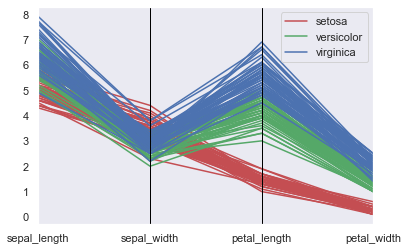

In [164]:
#untuk melihat koordinat
pd.plotting.parallel_coordinates(iris, 'species', color=('r','g','b'))
plt.show()

In [167]:
# timeseries plot
fmri = sns.load_dataset('fmri')
fmri.sample(10)

,subject,timepoint,event,region,signal
261,s4,0,stim,parietal,-0.048869
798,s6,0,cue,frontal,0.018653
164,s3,7,stim,parietal,0.390466
374,s11,7,stim,frontal,0.100876
521,s0,0,stim,parietal,-0.039327
385,s8,8,stim,frontal,0.087507
764,s5,2,cue,parietal,0.025403
771,s3,2,cue,parietal,-0.013869
1027,s2,9,cue,frontal,-0.037689
467,s3,12,stim,frontal,-0.103477


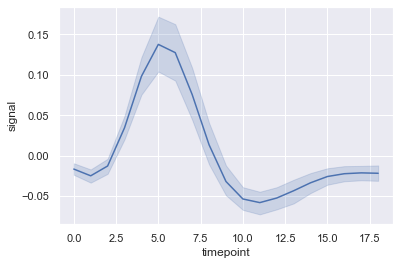

In [168]:
plot = sns.lineplot(x='timepoint', y='signal', data=fmri)

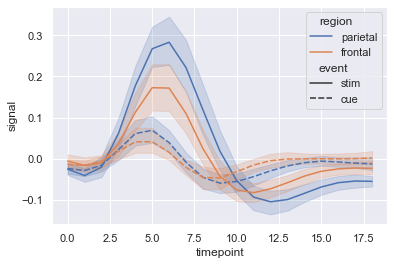

In [170]:
plot = sns.lineplot(x='timepoint', y='signal',hue='region', style='event',data=fmri)

In [173]:
#spatial visualization
def generateBaseMap(default_location=[-0.789275, 113.911], default_zoom_start = 5):
    base_map = folium.Map(location=default, control_scale=True, zoom_start=default_zoom_start)
    return base_map

In [176]:
df_loc = pd.read_csv('df_loc.csv')
df_loc.head()

,lat,lon,count
0,-6.87602,107.620,1
1,-7.79558,110.369,1
2,-6.87848,107.426,1
3,-6.12889,106.180,1
4,-6.20876,106.846,1
